In [4]:
import sys
import glob
import os
import re
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import datetime
%matplotlib inline

In [5]:
def sum_throughput(trace):
    s = []
    for t in trace:
        trace = pd.read_table(t, header=None, sep=(","),names=("seconds", "rate"))
        if len(s) == 0: s = trace
        else: s += trace
    return s

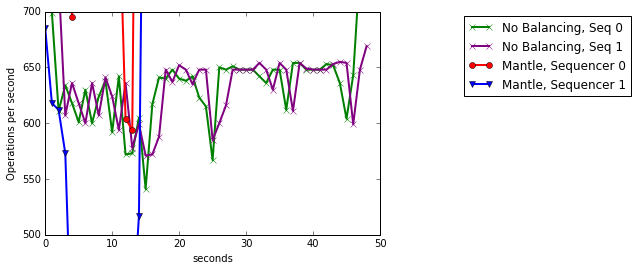

In [47]:
fig = plt.figure()
ax = fig.add_subplot(111)

#s = sum_throughput(glob.glob("isolated*.csv"))
#ax.plot(range(0, len(s['rate'])), s['rate'], 
#        'b-', linewidth=2.0, label="Sequencer Balancer")

s = sum_throughput(glob.glob("nobal-issdm*.csv"))
ax.plot(range(0, len(s['rate'])), s['rate'], 
        'g-', marker='x', linewidth=2.0, label="No Balancing, Seq 0")

s = sum_throughput(glob.glob("nobal-back*.csv"))
ax.plot(range(0, len(s['rate'])), s['rate'], 
        '-', color='purple', marker='x', linewidth=2.0, label="No Balancing, Seq 1")

s = sum_throughput(glob.glob("mantle-issdm*.csv"))
ax.plot(range(0, len(s['rate'])), s['rate'], 
        'r-', marker='o', linewidth=2.0, label="Mantle, Sequencer 0")

s = sum_throughput(glob.glob("mantle-back*.csv"))
ax.plot(range(-1, len(s['rate']) - 1), s['rate'], 
        '-', color='blue', marker='v', linewidth=2.0, label="Mantle, Sequencer 1")

ax.set_xlabel("seconds")
ax.set_ylabel("Operations per second")
#ax.set_ylim(0, 2000)
ax.set_ylim(500, 700)
#ax.set_xlim(0, 50)
lgd = ax.legend(loc='center', bbox_to_anchor=(1.5, 0.8))

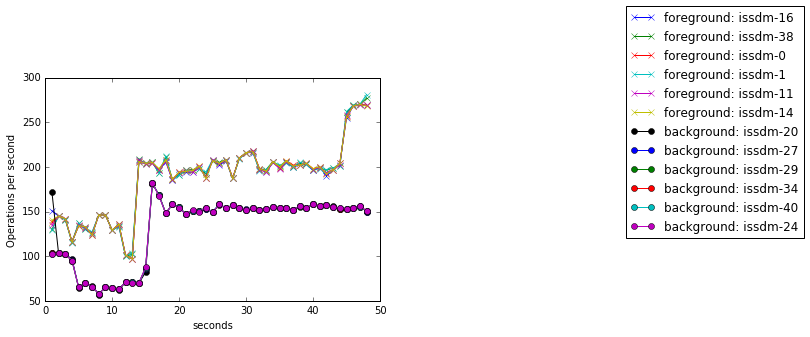

In [43]:
fig = plt.figure()
ax = fig.add_subplot(111)

for i in [16, 38, 0, 1, 11, 14]:
    fname = "foreground: issdm-" + str(i)
    s = sum_throughput(glob.glob("mantle-issdm-" + str(i) + "-throughput.csv"))
    ax.plot(range(0, len(s['rate'])), s['rate'], marker='x', label=fname)
for i in [20, 27, 29, 34, 40, 24]:
    fname = "background: issdm-" + str(i)
    s = sum_throughput(glob.glob("mantle-background-issdm-" + str(i) + "-throughput.csv"))
    ax.plot(range(0, len(s['rate'])), s['rate'], marker='o', label=fname)   
    
ax.set_xlabel("seconds")
ax.set_ylabel("Operations per second")
lgd = ax.legend(loc='center', bbox_to_anchor=(2, 0.8))